# **Data Understanding**

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Cyclists Dataset**

In [113]:
cyclists_df = pd.read_csv('../dataset/cyclists.csv')

cyclists_numeric = ["birth_year", "height", "weight"]
cyclists_categorical = ["nationality"]

In [114]:
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


### **Basic Checks**

### • Attribute Types

In [115]:
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


From an initial check there are no particular anomalies in the attribute types.

### • Non-Null Values Check

In [116]:
cyclists_df.isnull().any()

_url           False
name           False
birth_year      True
weight          True
height          True
nationality     True
dtype: bool

We plot a histogram showing how many null values there are for each attribute to get a more clear view.

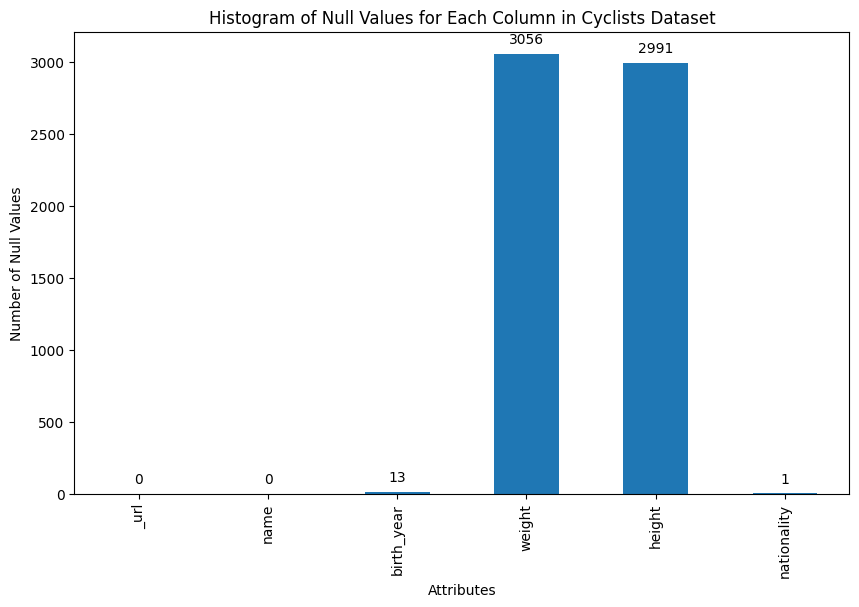

In [117]:
# Calculate the number of null values for each column
null_counts = cyclists_df.isnull().sum()

# Plot the histogram
null_counts.plot(kind='bar', figsize=(10, 6), title='Histogram of Null Values for Each Column in Cyclists Dataset')
plt.xlabel('Attributes')
plt.ylabel('Number of Null Values')
# Add y values over the columns
for i, v in enumerate(null_counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

The attributes with the most null values are weight and height.

### **Basic Statistics**

In [118]:
cyclists_df[cyclists_numeric].describe()

,birth_year,height,weight
count,6121.000000,3143.000000,3078.000000
mean,1974.071884,179.815145,68.658739
std,15.535834,6.443447,6.348183
min,1933.000000,154.000000,48.000000
25%,1962.000000,175.000000,64.000000
50%,1974.000000,180.000000,69.000000
75%,1987.000000,184.000000,73.000000
max,2004.000000,204.000000,94.000000


We briefly validate the min/max values querying the web.

In [119]:
print('Min values corresponding cyclists:')
print(f'- {cyclists_df[cyclists_df["birth_year"] == 1933]["name"].values[0]} was born in 1933')
print(f'- {cyclists_df[cyclists_df["height"] == 154]["name"].values[0]} was tall 154 cm')
print(f'- {cyclists_df[cyclists_df["weight"] == 48]["name"].values[0]} weighted 48 kg')

print()

print('Max values corresponding cyclists:')
print(f'- {cyclists_df[cyclists_df["birth_year"] == 2004]["name"].values[0]} was born in 2004')
print(f'- {cyclists_df[cyclists_df["height"] == 204]["name"].values[0]} was tall 204 cm')
print(f'- {cyclists_df[cyclists_df["weight"] == 94]["name"].values[0]} weighted 94 kg')

Min values corresponding cyclists:
- Rik Van Looy was born in 1933
- Vicente  Belda was tall 154 cm
- José Humberto  Rujano weighted 48 kg

Max values corresponding cyclists:
- Joshua  Tarling was born in 2004
- Conor  Dunne was tall 204 cm
- Magnus  Bäckstedt weighted 94 kg


All of this data are real according to the web.

### **Columns Analysis**

#### ```_url``` column


This categorical column contains the unique URL identifier of a cyclist. As we can see after a simple check, the 6134 total values are unique: there are no duplicates in the column nor null values.

In [120]:
print(cyclists_df['_url'].duplicated().sum(), 'duplicates found')


0 duplicates found


In [121]:
cyclists_df['_url'].isnull().sum()

np.int64(0)

#### ```Name``` column

It is a categorical column containing the name of a cyclist. As we can see by a first check, there are 7 duplicates in the column. So we analyze them in details.

In [122]:
print(cyclists_df['name'].duplicated().sum(), 'duplicates found')

7 duplicates found


Since the ```_url_``` values are unique we exclude that there are duplicates. Indeed, by visualising which duplicates are in the ```name``` column and their associated ```_url_``` values, we can assume that they are different people since, for istance, ```Sergio Domínguez``` is associated to ```sergio-dominguez-rodriguez``` and ```sergio-dominguez-munoz``` which are two existent and different cyclists. 

In this example, therefore, the value in the name column is simply a shortened name that is associated with two different cyclists. In case the extended name is the same, we can see that the ```_url_``` value contains a number in the tail to identify the two different cyclists. For example, ```Alessandro Pozzi``` or ```Andrea Peron``` are associated respectively with ```alessandro-pozzi```, ```alessandro-pozzi2``` and ```andrea-peron```, ```andrea-peron-1```. 

In [123]:
cyclists_df[cyclists_df.duplicated(subset='name', keep=False)][['_url', 'name']]

,_url,name
347,andrea-peron-1,Andrea Peron
1745,roman-kreuziger-sr,Roman Kreuziger
2235,alessandro-pozzi2,Alessandro Pozzi
2601,roman-kreuziger,Roman Kreuziger
2682,andrea-peron,Andrea Peron
2862,antonio-cabello-baena,Antonio Cabello
2939,jesus-lopez23,Jesús López
2953,alberto-fernandez-sainz,Alberto Fernández
3238,antonio-cabello,Antonio Cabello
4917,sergio-dominguez-rodriguez,Sergio Domínguez


In [124]:
cyclists_df[cyclists_df['name'].isin(['Andrea  Peron', 'Alessandro  Pozzi'])]

,_url,name,birth_year,weight,height,nationality
347,andrea-peron-1,Andrea Peron,1971.0,70.0,183.0,Italy
2235,alessandro-pozzi2,Alessandro Pozzi,1969.0,NaN,NaN,Italy
2682,andrea-peron,Andrea Peron,1988.0,70.0,178.0,Italy
5722,alessandro-pozzi,Alessandro Pozzi,1954.0,NaN,NaN,Italy


Again, an online search allowed us to verify that these are four different people, and also validated the data associated with them in the other columns of the dataset. 

Apparently no standard is used in the ```_url_``` values to mark two different cyclists. For example, there are two cyclists in the dataset:```Jesús López Carril``` (1949) and ```Jesús López Soriano``` (1955). For the fisrt one, the ```_url``` is ```jesus-lopez-carril``` as expected. For the second one we would have expected an ```_url``` value like ```jesus-lopez-soriano```, instead it is ```jesus-lopez23```

In [125]:
cyclists_df[cyclists_df['name'] == 'Jesús  López']

,_url,name,birth_year,weight,height,nationality
2939,jesus-lopez23,Jesús López,1955.0,NaN,NaN,Spain
5040,jesus-lopez-carril,Jesús López,1949.0,NaN,NaN,Spain


#### ```birth_year``` column

This is a numerical (?) attribute indicating the birth year of a cyclist. For obvious reasons duplicates are allowed. We check if there are null values.

In [126]:
int(cyclists_df['birth_year'].isnull().sum())

13

Since there are only 13 null values we show all the related rows.

In [127]:
cyclists_df[cyclists_df['birth_year'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN
601,vladimir-malakov,Vladimir Malakov,NaN,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,NaN,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,NaN,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,NaN,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,NaN,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,NaN,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,NaN,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,NaN,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,NaN,NaN,NaN,Spain


As we can see from the table above, also the ```weight``` and ```height``` values are ```NaN``` when ```birth_year``` is null.

##### Plots

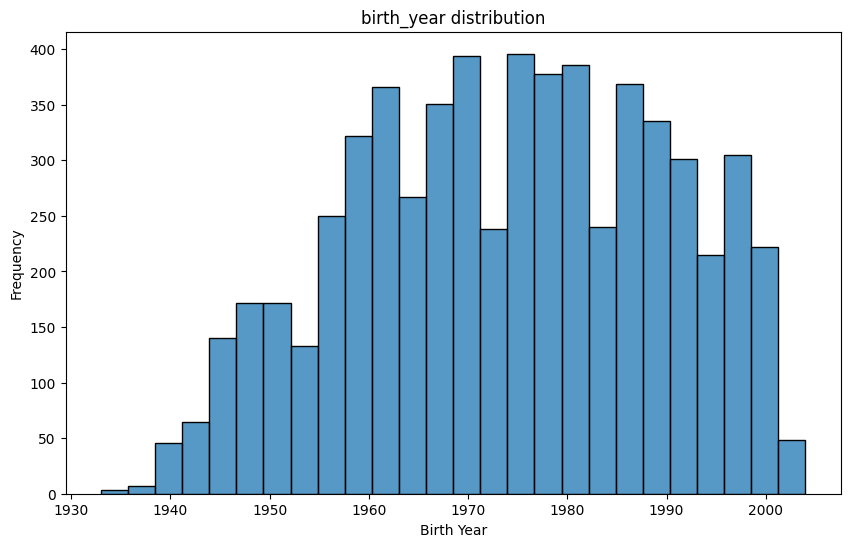

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna())
plt.title('birth_year distribution')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

TODO: comment histogram

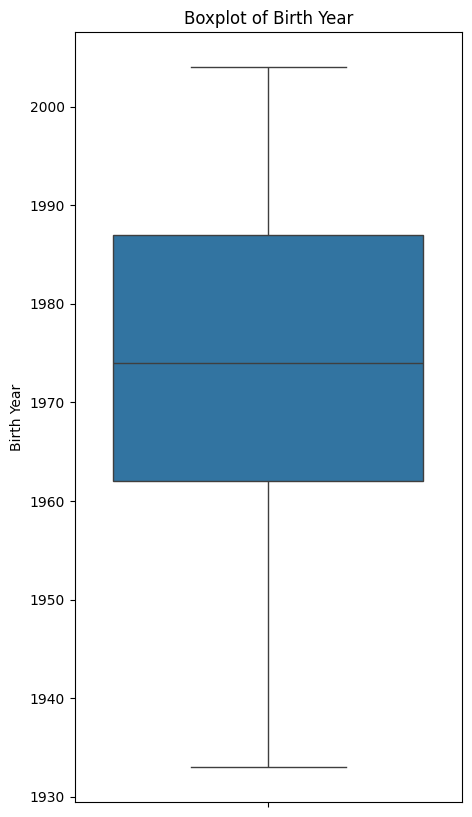

In [129]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=cyclists_df['birth_year'])
plt.title('Boxplot of Birth Year')
plt.ylabel('Birth Year')
plt.show()

Count number of outliers using IQR method

In [130]:
from utils import count_outliers
count_outliers(cyclists_df['birth_year'])

Number of outliers: 0 over 6121 values


In [131]:
cyclists_df['birth_year'].describe()

count    6121.000000
mean     1974.071884
std        15.535834
min      1933.000000
25%      1962.000000
50%      1974.000000
75%      1987.000000
max      2004.000000
Name: birth_year, dtype: float64

Overall, the distribution of ```birth_year``` is centered in 1974, with most people being born between 1962 and 1987, and the total range spans from 1933 to 2004. There don't seem to be any outliers as no individual points are plotted outside of the whiskers.

#### ```weight``` column

This is a numerical attribute. Duplicates are allowed for obvious reasons. We check null values.

In [132]:
int(cyclists_df['weight'].isnull().sum())

3056

In [133]:
cyclists_df[cyclists_df['weight'].isnull()].sample(25)

,_url,name,birth_year,weight,height,nationality
4233,philippe-louviot,Philippe Louviot,1964.0,NaN,NaN,France
1810,faustino-ruperez,Faustino Rupérez,1956.0,NaN,NaN,Spain
2956,antonio-miguel,Antonio Miguel Diaz,1968.0,NaN,NaN,Spain
5836,matheo-vercher,Mattéo Vercher,2001.0,NaN,171.0,France
2062,juan-pujol,Juan Pujol,1952.0,NaN,NaN,Spain
179,dmitry-nelyubin,Dmitry Nelyubin,1971.0,NaN,NaN,Russia
4632,iker-leonet,Iker Leonet,1983.0,NaN,NaN,Spain
988,juan-tomas-martinez,Juan Tomas Martinez,1962.0,NaN,NaN,Spain
3999,herculano-ferreira-de-oliveira,Herculano Ferreira de Oliveira,1946.0,NaN,NaN,Portugal
2289,pedro-torres,Pedro Torres,1949.0,NaN,NaN,Spain


There are 3056 ```NaN``` values for the ```weight``` attribute. By picking a small random sample of the rows where  the ```weight``` attribute is ```NaN``` we notice that also the ```height``` is ```NaN```.

##### Plots

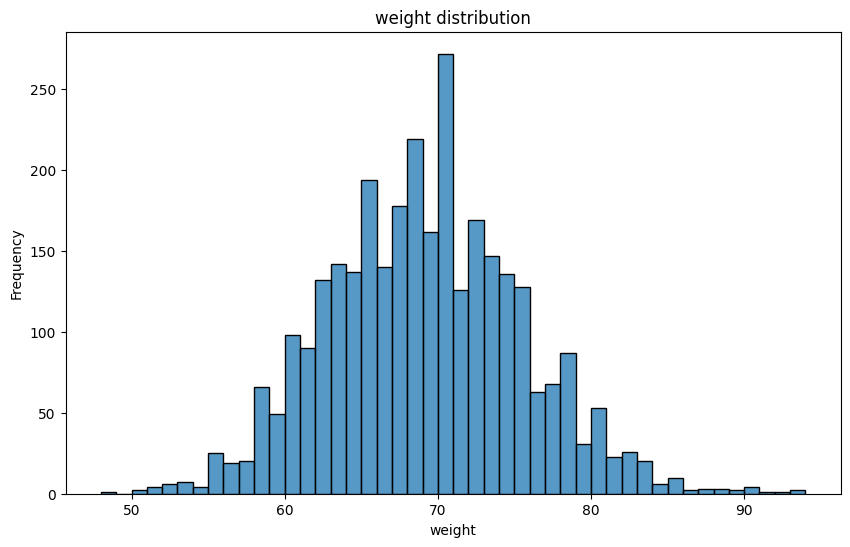

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), binwidth=1)
plt.title('weight distribution')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.show()

TODO: comment the histogram

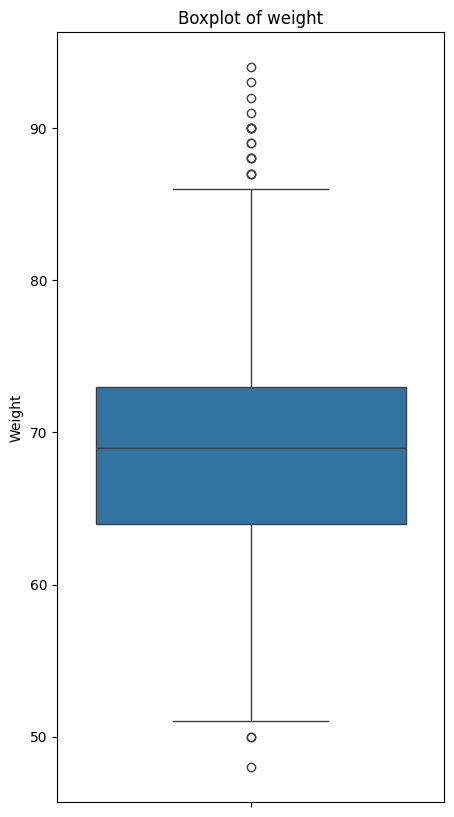

In [135]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=cyclists_df['weight'])
plt.title('Boxplot of weight')
plt.ylabel('Weight')
plt.show()

Count number of  outliers basing on IQR method

In [136]:
from utils import count_outliers
count_outliers(cyclists_df['weight'])

Number of outliers: 19 over 3078 values


In [137]:
cyclists_df['weight'].describe()

count    3078.000000
mean       68.658739
std         6.348183
min        48.000000
25%        64.000000
50%        69.000000
75%        73.000000
max        94.000000
Name: weight, dtype: float64

There are some outliers, more concentrated on the upper whisker. This, together with the other characteristics of the boxplot suggests positive skewness.

#### ```height``` column

This is a numerical attribute. Duplicates are allowed for obvious reasons. We check null values.

In [138]:
int(cyclists_df['height'].isnull().sum())

2991

There are 2991 ```NaN``` values for the ```height``` attribute. As mentioned above, it is very likely to find a ```NaN``` in ```height``` column when even ```weight``` is ```NaN```.

##### Plots

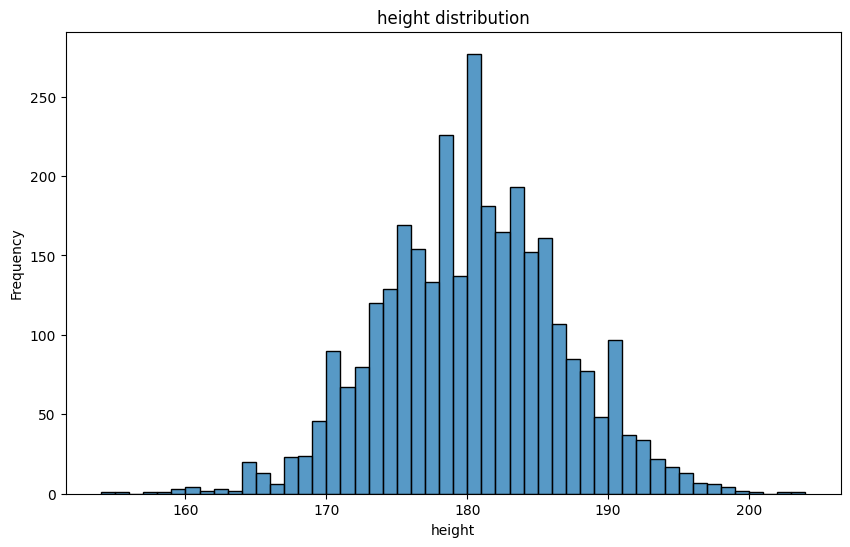

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), binwidth=1)
plt.title('height distribution')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

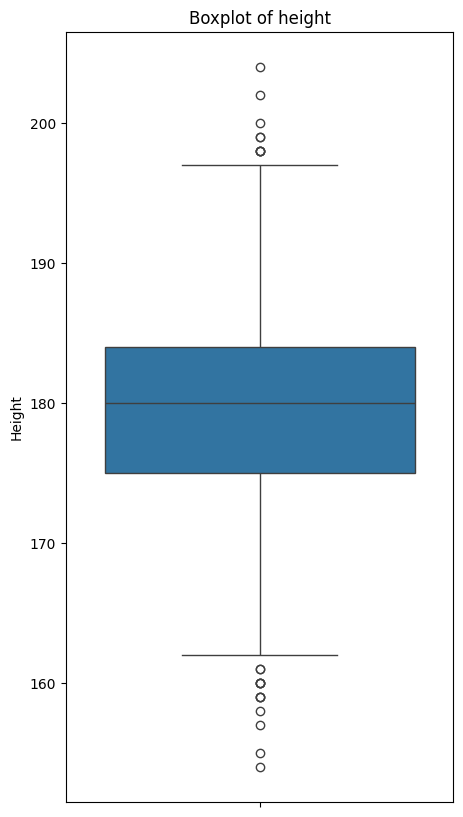

In [140]:
plt.figure(figsize=(5, 10))
sns.boxplot(y=cyclists_df['height'])
plt.title('Boxplot of height')
plt.ylabel('Height')
plt.show()

Counting number of outliers basing on IQR method

In [141]:
from utils import count_outliers
count_outliers(cyclists_df['height'])

Number of outliers: 22 over 3143 values


In [142]:
cyclists_df['height'].describe()

count    3143.000000
mean      179.815145
std         6.443447
min       154.000000
25%       175.000000
50%       180.000000
75%       184.000000
max       204.000000
Name: height, dtype: float64

There are some outliers, this time concentrated more or less equally beyond both the whiskers. The boxplot, together with the histogram plotted before, suggest a relatively symmetric distribution of the ```height``` values

#### ```nationality``` column

This is a categorical attribute. Duplicates are allowed. We check the presence of null values.

In [143]:
int(cyclists_df['nationality'].isnull().sum())

1

In [144]:
cyclists_df[cyclists_df['nationality'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,NaN


There is only one null value in the ```nationality``` column.

In [145]:
cyclists_df['nationality'].unique()

array(['Italy', 'France', 'Netherlands', 'Belgium', 'Spain',
       'United States', nan, 'Norway', 'Russia', 'Poland', 'Germany',
       'Australia', 'Switzerland', 'Ireland', 'Denmark', 'Great Britain',
       'Colombia', 'South Africa', 'Argentina', 'New Zealand',
       'Lithuania', 'Portugal', 'Austria', 'Yugoslavia', 'Estonia',
       'Romania', 'Slovenia', 'Canada', 'Latvia', 'Luxembourg', 'Sweden',
       'Czech Republic', 'Slovakia', 'Morocco', 'Ukraine', 'Ethiopia',
       'Belarus', 'Venezuela', 'Japan', 'Mexico', 'Croatia', 'Kazakhstan',
       'Uruguay', 'Israel', 'Namibia', 'Eritrea', 'Costa Rica', 'Taiwan',
       'Azerbaijan', 'Hungary', 'Moldova', 'Panama', 'Finland',
       'Bulgaria', 'Serbia', 'Brazil', 'Iran', 'Greece', 'Chile',
       'Ecuador', 'China', 'Albania', 'Guatemala', 'Uzbekistan',
       'Algeria', 'Tunisia', 'Monaco', 'Rwanda', 'Dominican Republic',
       'Liechtenstein', 'Zimbabwe', 'Puerto Rico', 'Hongkong'],
      dtype=object)

Displaying the unique values of ```nationality``` there are apparently no problematic values in the column. All values are semantically and syntactically (check!!!) correct.

##### Plots

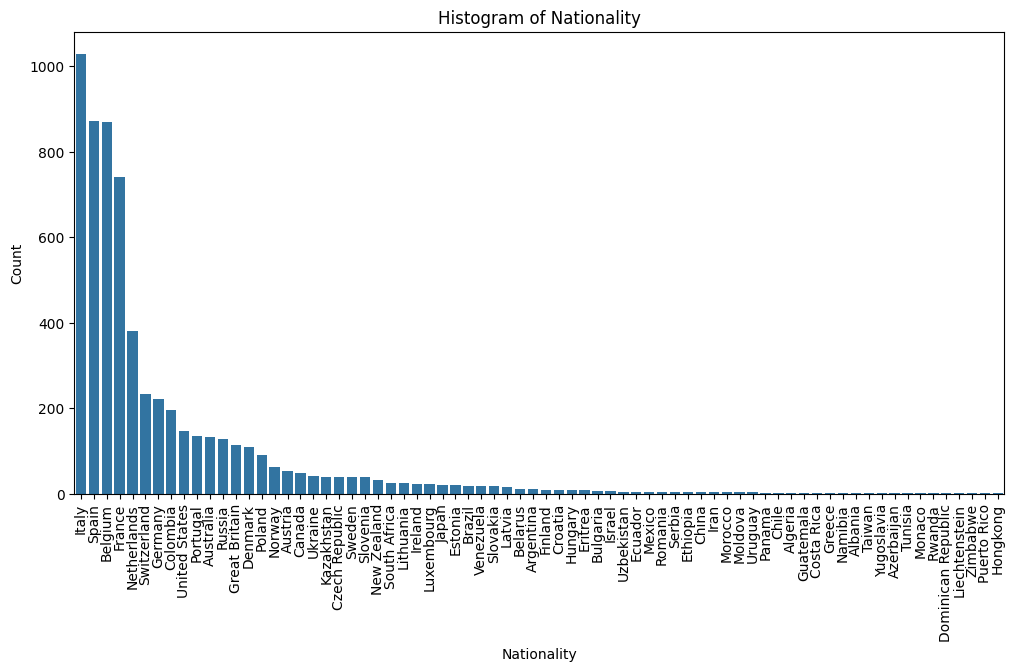

In [146]:
plt.figure(figsize=(12, 6))
sns.countplot(x='nationality', data=cyclists_df, order=cyclists_df['nationality'].value_counts().index)
plt.title('Histogram of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **Correlation Analysis**

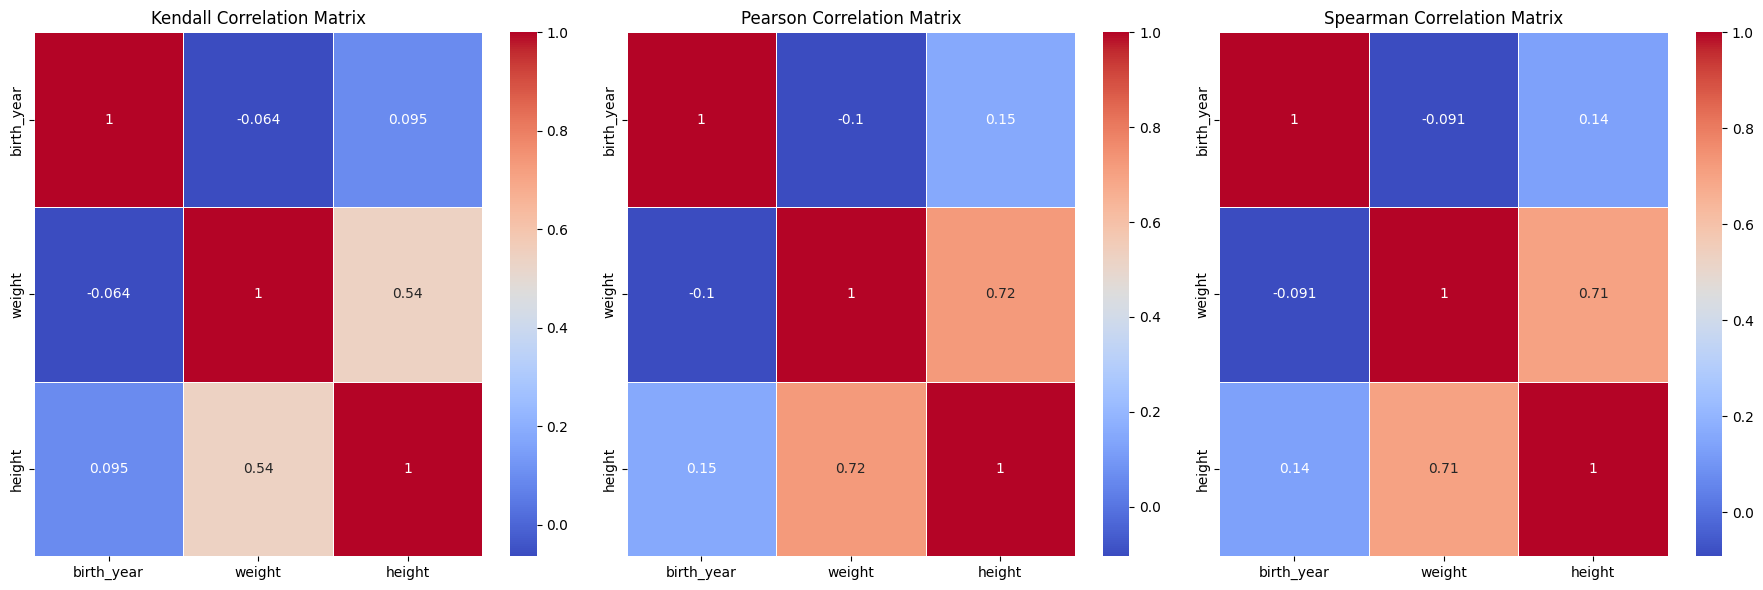

In [147]:
from utils import center_and_scale, correlations, plot_correlations

normalized_cyclist, normalization_scalers_cyclist = center_and_scale(cyclists_df)
cyclists_corr = correlations(normalized_cyclist)

plot_correlations(cyclists_corr)

# **Races Dataset**

In [148]:
races_df = pd.read_csv('../dataset/races.csv')

races_numeric_stage = ["length", "climb_total", "startlist_quality", "average_temperature"]
races_numeric = ["position", "cyclist_age", "delta"]
races_categorical = ["points", "uci_points", "profile"]
races_binary = ["is_tarmac", "is_cobbled", "is_gravel"]

### **Basic Checks**

#### • Attributes types

In [149]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

#### • Check null values

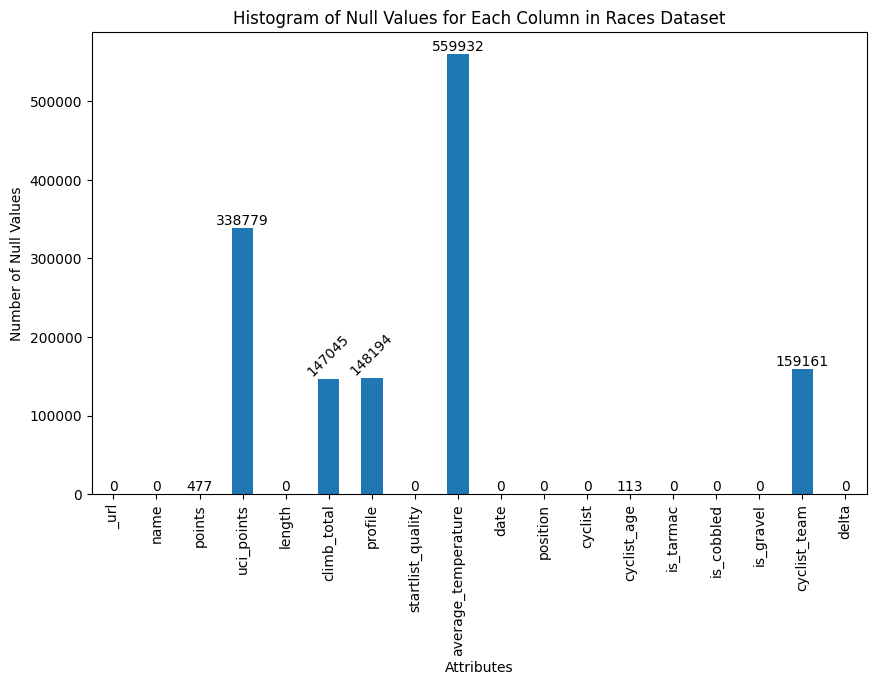

In [150]:
# Calculate the number of null values for each column
null_counts = races_df.isnull().sum()

# Plot the histogram
ax = null_counts.plot(kind='bar', figsize=(10, 6), title='Histogram of Null Values for Each Column in Races Dataset')
plt.xlabel('Attributes')
plt.ylabel('Number of Null Values')

# Add y values over the columns, rotating only for "climb_total" and "profile"
for i, v in enumerate(null_counts):
    if null_counts.index[i] in ["climb_total", "profile"]:
        ax.text(i, v + 50, str(v), ha='center', va='bottom', rotation=45)
    else:
        ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

#### • Duplicates

It is easy to observe that for each entry related to a stage of a race, different cyclists should be associated. We therefore check that this is true and that there are no duplicates. 

In [151]:
# Group by '_url' and 'cyclist' and count the occurrences
duplicate_cyclists = races_df.groupby(['_url', 'cyclist']).size().reset_index(name='count')

# Filter the groups where count is greater than 1
duplicate_cyclists = duplicate_cyclists[duplicate_cyclists['count'] > 1]

# Display the duplicate cyclists
print(duplicate_cyclists)


                                _url            cyclist  count
9550           dauphine/2005/stage-1     ivan-gutierrez      2
9703           dauphine/2005/stage-2     ivan-gutierrez      2
9854           dauphine/2005/stage-3     ivan-gutierrez      2
10002          dauphine/2005/stage-4     ivan-gutierrez      2
10144          dauphine/2005/stage-5     ivan-gutierrez      2
...                              ...                ...    ...
500394  vuelta-a-espana/1997/stage-3  eleuterio-anguita      2
500777  vuelta-a-espana/1997/stage-5  eleuterio-anguita      2
500957  vuelta-a-espana/1997/stage-6  eleuterio-anguita      2
501131  vuelta-a-espana/1997/stage-7  eleuterio-anguita      2
501303  vuelta-a-espana/1997/stage-9  eleuterio-anguita      2

[123 rows x 3 columns]


We assume that there are 123 duplicates in the dataset that should be handled during the data preparation process.

In [152]:
# # Count the duplicate values in the 'cyclist' column with the same value in the '_url' column
# duplicate_counts = races_df.groupby('_url')['cyclist'].value_counts()

# # filter only cyclists duplicated in the same stage
# duplicate_counts = duplicate_counts[duplicate_counts > 1]

# duplicate_counts.to_csv('../dataset/cyclist_duplicate.csv', header=True)

# #count number of total duplicates in the races dataset
# print("Number of total duplicates in the races dataset: ", duplicate_counts.count())

#### • Unique values

Checking unique values for each column in the dataset

In [153]:
distinct_points_count = races_df.nunique()
print("Number of distinct values in 'points':", distinct_points_count)

Number of distinct values in 'points': _url                     5281
name                       61
points                     14
uci_points                 20
length                   1280
climb_total              2117
profile                     5
startlist_quality         697
average_temperature        27
date                   140509
position                  210
cyclist                  6095
cyclist_age                29
is_tarmac                   2
is_cobbled                  1
is_gravel                   1
cyclist_team               91
delta                    2836
dtype: int64


Another important thing we want to assess is that details of a stage are the same i.e. there are no inconsistent entries.

In [154]:
race_attributes = ["name", "points", "uci_points", "length", "climb_total", 
                   "startlist_quality", "average_temperature", "is_tarmac"] #TODO: siamo sicuri che ci siano tutti gli attributi?

# Initialize an empty list to store _url values where inconsistencies are found
inconsistent_urls = []

# Check for each attribute in race_attributes
for attribute in race_attributes:
    # Group by _url and check if all values in the group are the same
    inconsistent = races_df.groupby('_url')[attribute].nunique() > 1
    # Append the _url values with inconsistencies to the list
    inconsistent_urls.extend(inconsistent[inconsistent].index.tolist())

# Display the inconsistent _url values
print("Inconsistent _url values:", len(inconsistent_urls))



Inconsistent _url values: 0


Analyzing numeric columns

In [155]:
races_numeric_stage = ["length", "climb_total", "startlist_quality", "average_temperature"]

races_numeric_stage.append("_url")

numeric_df = races_df[races_numeric_stage].groupby("_url").first().reset_index()

numeric_df.describe()


,length,climb_total,startlist_quality,average_temperature
count,5281.000000,3067.000000,5281.000000,205.000000
mean,165685.627722,2375.650473,988.701572,21.624390
std,67889.860679,1394.390513,380.450977,5.959042
min,1000.000000,2.000000,115.000000,10.000000
25%,149000.000000,1333.000000,747.000000,17.000000
50%,179000.000000,2307.000000,917.000000,22.000000
75%,205500.000000,3358.000000,1165.000000,26.000000
max,338000.000000,6974.000000,2047.000000,36.000000


### **Columns Analysis**

#### ```_url``` column

In [156]:
races_df['_url'].nunique()

5281

This column contains the unique identifier of a race's stage. There are in total 5281 different _url values. An _url is in the format "RACE_NAME/RACE_DATE/STAGE_NUMBER". For example, the URL "tour-de-france/1978/stage-6" denotes the 6th stage of the Tour de France, 1978 edition. It is associated to some race stage details TODO: evaluate adding which are the details?

In [157]:
races_df.head(10)

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0
5,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,5,jacques-esclassan,30.0,True,False,False,kelme-costa-blanca-2000,27.0
6,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,6,walter-planckaert,30.0,True,False,False,navigare-blue-storm-1993,27.0
7,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,7,guy-sibille,30.0,True,False,False,NaN,27.0
8,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,8,jacques-bossis,26.0,True,False,False,NaN,27.0
9,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:51,9,bernard-bourreau,27.0,True,False,False,NaN,27.0


Obviously, if we look only at the column itself, we will find duplicate values. However, by looking at the first ten rows of the table, we assume that there is an entry for each rider who participated in a given stage. Given this observation, we already checked that there are no duplicates for the same stage in terms of participating riders (see the above Duplicate section for the results).

### ```name``` column

The attribute is categorical. First of all we check if there are null values.

In [158]:
races_df['name'].isnull().sum()

np.int64(0)

In [159]:
races_df['name'].nunique()

61

There are no null values in the column which contains 61 unique values. They are the names of different races. We show those values to check in a qualitative way if there are some errors TODO: check the correct term to identify errors (e.g. "asfdnajsfa")

In [160]:
races_df['name'].unique()

array(['Tour de France', 'Vuelta a España', 'Volta Ciclista a Catalunya',
       'Paris - Nice', 'Tirreno-Adriatico',
       'Critérium du Dauphiné Libéré', 'Critérium du Dauphiné',
       'Ronde van Vlaanderen / Tour des Flandres', 'Milano-Sanremo',
       'Tour de Suisse', "Giro d'Italia", 'Gran Camiño',
       'Tour de Romandie', 'Volta a Catalunya',
       'La Vuelta ciclista a España', 'La Flèche Wallonne',
       'E3-Prijs Harelbeke', 'Vuelta al País Vasco',
       'Vuelta Ciclista al País Vasco', 'Liège - Bastogne - Liège',
       'Paris-Roubaix', 'UAE Tour', 'World Championships ME - Road Race',
       'Amstel Gold Race', 'Dwars door België / À travers la Belgique',
       'Itzulia Basque Country', 'World Championships - Road Race',
       'Criterium du Dauphiné Libére', 'Omloop Het Volk',
       'Clasica Ciclista San Sebastian', 'Paris - Roubaix',
       'Strade Bianche', 'Giro di Lombardia', 'Criterium du Dauphiné',
       'O Gran Camiño', 'Grand Prix Cycliste de Quebec',
   

In [161]:
# Split the _url column at the first '/' and take the first part
race_names = races_df['_url'].str.split('/', n=1).str[0]
# Count the unique values
race_names.nunique()


27

In [162]:
for name, group in races_df.groupby('name'):
    print(f"Race Name: {name}")
    unique_urls = group['_url'].str.split('/', n=1).str[0].unique()
    print(unique_urls)
    print()

Race Name: Amstel Gold Race
['amstel-gold-race']

Race Name: Clasica Ciclista San Sebastian
['san-sebastian']

Race Name: Clásica Ciclista San Sebastian
['san-sebastian']

Race Name: Clásica Ciclista San Sebastián
['san-sebastian']

Race Name: Clásica San Sebastián
['san-sebastian']

Race Name: Criterium du Dauphiné
['dauphine']

Race Name: Criterium du Dauphiné Libére
['dauphine']

Race Name: Critérium du Dauphiné
['dauphine']

Race Name: Critérium du Dauphiné Libéré
['dauphine']

Race Name: Donostia San Sebastian Klasikoa
['san-sebastian']

Race Name: Dwars door België / À travers la Belgique
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen - A travers la Flandre ME
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen / A travers la Flandre
['dwars-door-vlaanderen']

Race Name: Dwars door Vlaanderen / A travers la Flandre ME
['dwars-door-vlaanderen']

Race Name: E3 BinckBank Classic
['e3-harelbeke']

Race N

We notice that the total race names used in the unique identifier are only 27. This is because, as we show below, the same RACE_NAME part of the identifier is associated to different values in the names column. This does not mean that the same identifier is associated with different races. Rather, the values in the name column for the same race differ only by a few letters (e.g. e instead of è) or because the race has adopted a different name over the years or is simply known by different names. 

In particular:
- ```san-sebastian``` is associated to _Clasica Ciclista San Sebastian_, _Clásica Ciclista San Sebastian_, _Clásica Ciclista San Sebastián_, _Clásica San Sebastián_, _Donostia San Sebastian Klasikoa_
- ```dauphine``` is associated to _Criterium du Dauphiné_, _Criterium du Dauphiné Libére_, _Critérium du Dauphiné_, _Critérium du Dauphiné Libéré_
- ```dwars-door-vlaanderen``` is associated to _Dwars door België / À travers la Belgique_, _Dwars door Vlaanderen_, _Dwars door Vlaanderen - A travers la Flandre ME_, _Dwars door Vlaanderen / A travers la Flandre_, _Dwars door Vlaanderen / A travers la Flandre ME_
- ```e3-harelbeke``` is associated to _E3 BinckBank Classic_, _E3 Harelbeke_, _E3 Prijs Vlaanderen_, _E3 Prijs Vlaanderen - Harelbeke_, _E3 Saxo Bank Classic_, _E3 Saxo Classic_, _E3-Prijs Harelbek_
- ```gp-quebec``` is associated to _Grand Prix Cycliste de Quebec_, _Grand Prix Cycliste de Québec_
- ```liege-bastogne-liege``` is associated to _Liège - Bastogne - Liège_, _Liège-Bastogne-Liège_
- ```strade-bianche``` is associated to _Monte Paschi Eroica_, _Montepaschi Strade Bianche - Eroica Toscana_, _Strade Bianche_
- ```omloop-het-nieuwsblad``` is associated to _Omloop Het Nieuwsblad ME_, _Omloop Het Volk_, _Omloop Het Volk ME_
- ```paris-roubaix``` is associated to _Paris - Roubaix_, _Paris-Roubaix_
- ```ronde-van-vlaanderen``` is associated to _Ronde van Vlaanderen - Tour des Flandres ME_, _Ronde van Vlaanderen / Tour des Flandres_, _Ronde van Vlaanderen / Tour des Flandres ME_
- ```volta-a-catalunya``` is associated to _Volta Ciclista a Catalunya_, _Volta a Catalunya_
- ```itzulia-basque-country``` is associated to _Vuelta Ciclista al País Vasco_, _Vuelta al País Vasco_
- ```world-championship``` is associated to _World Championships - Road Race_, _World Championships ME - Road Race_

#### ```points``` column

This is a numerical attribute. Same points for different cyclist are supposedly allowed. We check now for null values.

In [163]:
int(races_df['points'].isnull().sum())

477

In [164]:
races_df['points'].unique()

array([100.,  80.,  50., 275.,  20., 225., 125., 350.,  75.,  70.,  30.,
       150.,  35.,  nan,  18.])

In [165]:
races_df['points'].value_counts()

points
80.0     198878
50.0     186102
100.0    141706
275.0     22299
225.0     19536
125.0      5992
30.0       4313
350.0      3917
70.0       3299
75.0       1963
20.0        792
18.0        292
35.0        183
150.0       116
Name: count, dtype: int64

##### Plots

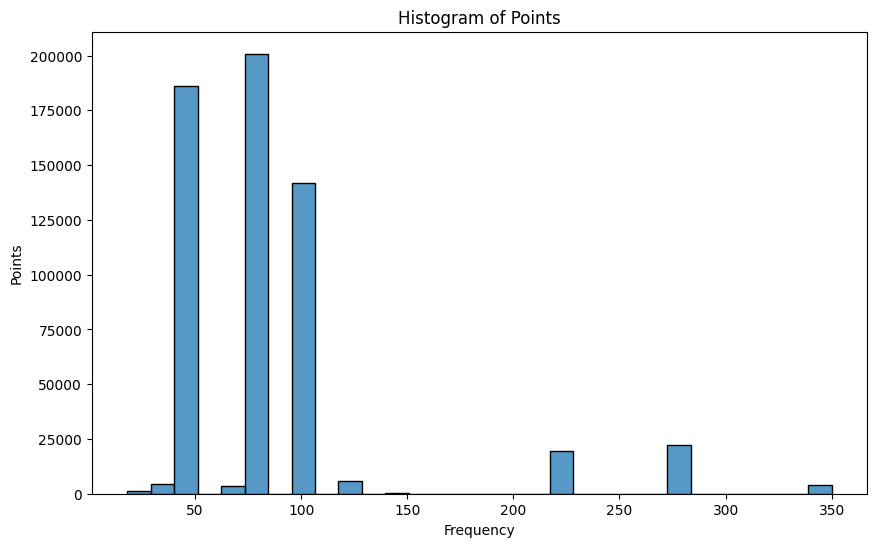

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(races_df['points'].dropna(), bins=30, kde=False)
plt.title('Histogram of Points')
plt.ylabel('Points')
plt.xlabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=races_df['points'])
plt.title('Boxplot of Points')
plt.ylabel('Points')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['points'])

#### ```uci_points``` column

In [ ]:
int(races_df['uci_points'].isnull().sum())

In [ ]:
races_df['uci_points'].dropna().unique()

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(races_df['uci_points'].dropna(), bins=30, kde=False)

# Add text labels on each bin with rotation
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2. + 0.1, height),
                    ha='center', va='center', xytext=(0, 25), textcoords='offset points', rotation=90)

# Set titles and labels
plt.title('Histogram of count values for UCI Points attribute')
plt.xlabel('UCI Points')
plt.ylabel('Frequency')

# Show the plot
plt.show()

##### Plots

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races_df['uci_points'].dropna(), bins=30, kde=False)
plt.title('Histogram of UCI Points')
plt.ylabel('UCI Points')
plt.xlabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=races_df['uci_points'])
plt.title('Boxplot of UCI Points')
plt.ylabel('Points')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['uci_points'])

#### ```length``` column 

this feature is in **races_numeric_stage** so first check is to see if the value length is consistent with all copies of the stages (url)

In [ ]:
# --- inconsistency check for 'length' ---

length_consistency = races_df.groupby('_url')['length'].nunique()
# Filter the groups where the number of unique 'profile' values is greater than 1
inconsistent_profiles = length_consistency[length_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'length' values:", len(inconsistent_profiles))

A **length_df** dataset is created where there are two columns: '_url' of the race (one for each copy) and associated the column 'length'. the value profile is taken from one of the rows where it is present in the original races_df dataset

In [69]:
# ---- length dataset creation ----

# Group by '_url' and select the first non-null value for 'length'
length_df = races_df.groupby('_url')['length'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

In [ ]:
# ---- boxplot of 'length' ----

plt.figure(figsize=(10, 6))
sns.boxplot(y=length_df['length'])
plt.title('Boxplot of length')
plt.ylabel('length (m)')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['length'])

In [ ]:
# ---- Statistics ----

# Column of interest
d = length_df['length']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

# Display the DataFrame
print(stats_df)

In [ ]:
# --- 'length' distribution plot ---

plt.figure(figsize=(10, 6))
sns.histplot(length_df['length'].dropna(), binwidth=5000)
plt.title('Distribution of Length Attribute')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

I think under 50km are all to be discarded ?

In [ ]:
short_stages_count = (length_df['length'] < 50000).sum()
print(f"Number of stages under 50 km: {short_stages_count}")

#### ```climb_total``` column 

this feature is in **races_numeric_stage** so first check is to see if the value length is consistent with all copies of the stages (url)

In [ ]:
# --- inconsistency check for 'climb_total' ---

climb_consistency = races_df.groupby('_url')['climb_total'].nunique()
# Filter the groups where the number of unique 'climb_total' values is greater than 1
inconsistent_profiles = climb_consistency[climb_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'climb_total' values:", len(inconsistent_profiles))

A **climb_df** dataset is created where there are two columns: '_url' of the race (one for each copy) and associated the column 'climb_total'. the value profile is taken from one of the rows where it is present in the original races_df dataset

In [76]:
# ---- climb_df dataset creation ----

# Group by '_url' and select the first non-null value for 'climb_total'
climb_df = races_df.groupby('_url')['climb_total'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

In [ ]:
# ---- boxplot -----

plt.figure(figsize=(10, 6))
sns.boxplot(y=climb_df['climb_total'])
plt.title('Boxplot of Race climb')
plt.ylabel('Length (meters)')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['climb_total'])

In [ ]:
# ---- Statistics ----

# Column of interest
d = climb_df['climb_total']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

print(stats_df)

In [ ]:
# ---- climb distribution plot ----

plt.figure(figsize=(10, 6))
sns.histplot(climb_df['climb_total'].dropna(), binwidth=100)
plt.title('Distribution of climb Attribute')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

#### ```profile``` column 

it is in **races_numeric_stage** so first check is to see if the value profile is consistent with all copies of the stages

In [ ]:
# --- inconsistency check for profile ---

profile_consistency = races_df.groupby('_url')['profile'].nunique()
inconsistent_profiles = profile_consistency[profile_consistency > 1]
print("Number of inconsistent '_url' values:", len(inconsistent_profiles))

A **profile_df** dataset is created where there are two columns: '_url' of the race (one for each copy) and associated the column 'profile'. the value profile is taken from one of the rows where it is present in the original races_df dataset

In [82]:
# ---- profile dataset creation ----

# Group by '_url' and select the first non-null value for 'profile'
profile_df = races_df.groupby('_url')['profile'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()


Since there are no inconsistencies, we can use **profile_df** dataset

In [ ]:
# ---- Statistics ----

num_unique_urls = races_df['_url'].nunique()
print(f"Number of unique URLs in races_df: {num_unique_urls}")
num_profile_consistency_rows = len(profile_df)
print(f"Number of rows in profile_consistency: {num_profile_consistency_rows}")
num_null_profile_consistency = profile_df['profile'].isnull().sum()
print(f"Number of null values in profile: {num_null_profile_consistency}")


In [ ]:
# --- Distribution Plot of the 'profile' attribute ---

# Print the frequencies of 'profile' in profile_df, excluding NaN values
profile_frequencies = profile_df['profile'].dropna().value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='profile', data=profile_df.dropna(subset=['profile']), width=0.4)
plt.title('Profile Distribution')
plt.xlabel('Profile')
plt.ylabel('Frequency')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### ```startlist_quality``` column

this feature is in **races_numeric_stage** so first check is to see if the value profile is consistent with all copies of the stages (url)

In [ ]:
# --- inconsistency check for 'startlist_quality' ---

profile_consistency = races_df.groupby('_url')['startlist_quality'].nunique()
# Filter the groups where the number of unique 'profile' values is greater than 1
inconsistent_profiles = profile_consistency[profile_consistency > 1]
# Display the inconsistent '_url' values
print("Number of inconsistent 'startlist_quality' values:", len(inconsistent_profiles))

A **startlist_df** dataset is created where there are two columns: '_url' of the race (one for each copy) and associated the column 'startlist'. the value profile is taken from one of the rows where it is present in the original races_df dataset

In [86]:
# ---- startlist dataset creation ----

# Group by '_url' and select the first non-null value for 'startlist_quality'
startlistq_df = races_df.groupby('_url')['startlist_quality'].apply(lambda x: x.dropna().iloc[0] if not x.isnull().all() else pd.NA).reset_index()

In [ ]:
# --- boxplot ---

plt.figure(figsize=(10, 6))
sns.boxplot(y=startlistq_df['startlist_quality'])
plt.title('Boxplot of startlist quality')
plt.ylabel('startlist quality')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['startlist_quality'])

In [ ]:
# ---- Statistics ----

# Column of interest
d = startlistq_df['startlist_quality']
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Null Count', 'Unique Value Counts', 'Mean', 'Max', 'Min', 'Variance', 'Description'],
    'Value': [
        d.isnull().sum(),
        d.nunique(),
        d.mean(),
        d.max(),
        d.min(),
        d.var(),
        d.describe().to_dict()
    ]
})

print(stats_df)

In [ ]:
# --- 'startlist_quality' distribution plot ---

plt.figure(figsize=(10, 6))
sns.histplot(startlistq_df['startlist_quality'].dropna(), bins=50)
plt.title('Distribution of Startlist Quality Attribute')
plt.xlabel('Startlist Quality')
plt.ylabel('Frequency')
plt.show()

### ```date``` column

This feature could be divetsa for each copy of the stages so it makes no sense to checke possible conisistencies. 
In stage races, there are different types of starts. In some, all cyclists start together, while in others (time trials), cyclists start one by one based on their ranking, with a few seconds in between (usually 1 minute). In other races (team time trials), teams start one group at a time with a set time gap.

### position column

In [ ]:
int(races_df['position'].isnull().sum())

For the same stage, we check if there are duplicates.

In [ ]:
# Group by '_url' and check for duplicate positions within each group
duplicate_positions = races_df.groupby('_url')['position'].apply(lambda x: x.duplicated(keep=False)).reset_index(drop=True)

# Filter the DataFrame to show only the rows with duplicate positions
races_df[duplicate_positions]

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races_df['position'], bins=30, kde=False)
plt.title('Histogram of Position')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

#### ```cyclist``` column

In [ ]:
races_df['cyclist'].isnull().sum()

There are no null values in the column. Duplicated are expected but we check if, for the same stage of a race, there are no duplicated cyclists values.

In [ ]:
races_df[races_df.duplicated(subset=['_url', 'cyclist'], keep=False)]

As we can see from the table above, for the same stage, there are duplicated ```cyclist``` values. We can also notice that in the same rows of a duplicate there are also other altered values like ```date```, ```positivon``` or ```delta```.

#### ```cyclist_age``` column

This is a numerical attribute. First of all we check if there are null values and if all the entries are numerical.

In [ ]:
races_df['cyclist_age'].isnull().sum()

In [ ]:
races_df['cyclist_age'].unique()

As we can see, there are 113 null entries but the remaining values are numerical.

Duplicates in the column are allowed but no for the same cyclist which can be also duplicated for the same stage as we checked in the previous column analysis. We check if the age reported for each cyclist is consistent across the column to gather more informations for the DP part.

In [ ]:
# Group by 'cyclist' and check if there are different 'cyclist_age' values
age_inconsistencies = races_df.groupby('cyclist')['cyclist_age'].nunique()

# Filter the cyclists with more than one unique age value
age_inconsistencies[age_inconsistencies > 1]


As expected the same cyclist is associated to more than one age value.

##### Plots

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(races_df['cyclist_age'].dropna(), bins=30)
plt.title('Histogram of Cyclist Age')
plt.xlabel('Cyclist Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=races_df['cyclist_age'])
plt.title('Boxplot of Cyclist Age')
plt.ylabel('Cyclist Age')
plt.show()

Counting number of outliers basing on IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['cyclist_age'])

#### ```is_tarmac``` column

This is a boolean column. We check the presence of null values, errors, and we plot the distribution of the True and False values.

In [ ]:
races_df['is_tarmac'].isnull().sum()

In [ ]:
races_df['is_tarmac'].unique()

In [ ]:
plt.figure(figsize=(6, 10))
sns.histplot(races_df['is_tarmac'], bins=2)
plt.title('Histogram of Is Tarmac')
plt.xlabel('Is Tarmac')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])
plt.show()

#### ```is_cobbled``` column

In [ ]:
# counting null values in is_cobbled column
int(races_df['is_cobbled'].isnull().sum())

In [ ]:
# unique values in is_cobbled column
races_df['is_cobbled'].value_counts()

Given that is_cobbled is alway false this column probably will be dropped

#### ```is_gravel``` column

In [ ]:
#counting null values in is_gravel column
int(races_df['is_gravel'].isnull().sum())

In [ ]:
races_df['is_gravel'].value_counts()

Given that is_gravel is alway false this column probably will be dropped

### ```cyclist_team``` column

In [ ]:
#counting null values in cyclist_team column
int(races_df['cyclist_team'].isnull().sum())

Counting how many different team there are

In [ ]:
print(f"Number of different teams: {races_df['cyclist_team'].nunique()}")

Check whether any cyclist has raced for several teams in his career. Then count them

In [ ]:
# Check groupin by cyclist and aggregating the unique teams
cyclist_teams = races_df.groupby('cyclist')['cyclist_team'].unique().reset_index()
display(cyclist_teams.head(7))

# Filter cyclists who have raced for more than one team
cyclists_multiple_teams = cyclist_teams[cyclist_teams['cyclist_team'].apply(lambda x: len(x) > 1)]
print(f"Number of cyclists who have raced for more than one team: {len(cyclists_multiple_teams)}")

As if it's possible to see in the plot cyclists typically have run with more than one team

Counting number of unique cyclists for each team

In [ ]:
unique_cyclists_df = races_df.drop_duplicates(subset=['cyclist_team', 'cyclist'])
unique_cyclists_per_team = unique_cyclists_df.groupby('cyclist_team')['cyclist'].nunique().reset_index()

# Plot the histogram with inverted x and y values
plt.figure(figsize=(20, 20))  # Increase the figure height for better readability
sns.barplot(y='cyclist_team', x='cyclist', data=unique_cyclists_per_team, order=unique_cyclists_per_team.sort_values('cyclist', ascending=False)['cyclist_team'])
plt.title('Number of Unique Cyclists per Team')
plt.ylabel('Cyclist Team')
plt.xlabel('Number of Unique Cyclists')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

This plot shows that all teams has at least one cyclist

In [ ]:
# Group by '_url' and 'cyclist' and check the number of unique 'cyclist_team' values
team_inconsistencies = races_df.groupby(['_url', 'cyclist'])['cyclist_team'].nunique()
# Filter the groups with more than one unique 'cyclist_team' value
inconsistent_teams = team_inconsistencies[team_inconsistencies > 1]

# Display the inconsistent entries
print(f"Inconsistent cyclist_team values for the same race _url and cyclist id: {len(inconsistent_teams)}")

#### ```delta``` column

In [ ]:
#counting null values in delta column
int(races_df["delta"].isnull().sum())

In [ ]:
races_df["delta"].describe()

In [ ]:
delta_races = races_df[races_df['delta'] <= 10000]

plt.figure(figsize=(10, 6))
sns.boxplot(y=delta_races['delta'].dropna())
plt.title('Boxplot of Delta Values')
plt.ylabel('Delta')
plt.show()


This row seems to be very noisy, containing negative values (that are not allowed for a delta value that represent how many seconds after the first-placed the cyclist get to the finish). Also to visualize something in the plot value greater then 10k are dropped in the plot so there're very very high value for delta that are very strange for professional races

Count number of outliers using IQR method

In [ ]:
from utils import count_outliers
count_outliers(races_df['delta'])

Visualization

In [ ]:
# try to visualize dfistribution removing some outliers
delta_races = races_df[(races_df['delta'] <= 2000) & (races_df['delta'] >= 0)]

plt.figure(figsize=(10, 6))
sns.histplot(delta_races['delta'].dropna(), bins=100)
plt.title('Histogram of Delta Values')
plt.xlabel('Delta')
plt.ylabel('Frequency')
plt.show()



### **Correlation Analysis**

In [ ]:
from utils import center_and_scale, correlations, plot_correlations

normalized_races, normalization_scalers_races = center_and_scale(races_df)
races_corr = correlations(normalized_races.drop(columns=['profile']))

plot_correlations(races_corr)

DECIDERE SE TENERE O NO LE CORRELAZIONI IN FORMATO PRECEDENTE:

In [ ]:
# Define the coefficients
coefficients = ['spearman']

# Exclude the '_url' column from the numeric columns list
races_numeric_stage_no_url = [col for col in races_numeric_stage + races_numeric + races_categorical if col != '_url']

# Plot the correlation matrices
plt.figure(figsize=(18, 6))

for i, c in enumerate(coefficients):
    plt.subplot(1, 3, i + 1)
    correlation_matrix = races_df[races_numeric_stage_no_url].corr(method=c)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'{c.capitalize()} Correlation Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Include the 'profile' attribute in the numeric columns list
races_numeric_stage_with_profile = races_numeric_stage_no_url + ['profile']

# Calculate the correlation matrix including the 'profile' attribute
correlation_matrix_with_profile = races_df[races_numeric_stage_with_profile].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_profile, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Profile Attribute')
plt.show()

### **Scatter Plot**: TO DO

# **Data Integration**

Some data understanding analysis for merged datasets

#### Checking if there are cyclists that not appear in races or vice versa

In [ ]:
# Elements in 'cyclist' column of races_data and not in '_url' column of cyclists_data
diff_races_not_in_cyclists = np.setdiff1d(races_df['cyclist'].unique(), cyclists_df['_url'].unique())
print("In 'races_data' but not in 'cyclists_data':", diff_races_not_in_cyclists)

# Elements in '_url' column of cyclists_data and not in 'cyclist' column of races_data
diff_cyclists_not_in_races = np.setdiff1d(cyclists_df['_url'].unique(), races_df['cyclist'].unique())
print("In 'cyclists_data' but not in 'races_data':", diff_cyclists_not_in_races)

print(races_df['cyclist'].unique().size)

len(diff_cyclists_not_in_races)

#### Checking if cyclist age column is aligned with cyclist birth year using the stage date

In [ ]:
from datetime import datetime

def extract_year(date):
    """ extract the year from a date string """
    try:
        return pd.to_datetime(date).dt.year
    except ValueError:
        return np.nan

# Drop rows with NaN values in 'date', 'cyclist_age' and 'birth_year' columns
races_df_clean = races_df.dropna(subset=['date', 'cyclist_age'])
cyclists_df_clean = cyclists_df.dropna(subset=['birth_year'])

# Merge the two dataframes on the 'cyclist' and '_url' columns
merged_df_clean = races_df_clean.merge(cyclists_df_clean, left_on='cyclist', right_on='_url', suffixes=('_race', '_cyclist'))

# Calculate the birth year from the 'date' and 'cyclist_age' columns
merged_df_clean['calculated_birth_year'] = extract_year(merged_df_clean['date']) - merged_df_clean['cyclist_age']

# Filter the rows where the calculated birth year does not match the actual birth year
wrong_age_clean = merged_df_clean[merged_df_clean['calculated_birth_year'] != merged_df_clean['birth_year']]

# Display the 'wrong_age' dataframe
print(f"Number of cyclists with wrong age in ne of the datasets: {len(wrong_age_clean)}")